<h1 style="text-align:center;color:#F4C2C2;" ><em>NeetCode_150</em></h1>

<h2 style ="color : #800020">Guidelines:</h2>

- Whenever learning a topic - 2 question needs to be answered from the lesson,then jump to problems.
    - Why do we need this?
    - How to do it?
- "Understand and Apply" - the only way to learn, Do not memorize - for that have notes.
- <strong>Codebagel</strong> for now seems good.

<h3 style = "text-align:center;color:pink">Array and Hashing</h3>

<font color = "cyan">Problem_217:</font> Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

In [3]:
#method 1 : bruteforce

def containsDuplicate(self,nums):
    l = len(nums)
    
    for i in range(l):
        c = 1
        for j in range (i+1,l):
            if nums[i] == nums[j]:
                c = c + 1
        if c >= 2:
            return True
        else:
            continue
    return False

a = [1,2,3,1]
containsDuplicate(0,a)



True

This approach fails when the test case is very big because it exceeds time limit.\
Unoptimal Solution - Complexity is $O(n^2)$

In [10]:
def Duplicate(self, nums):
    l = len(nums)
    nums.sort()
    for i in range(l):
        if l ==1:                   # (i-1) will be out of bounds 
            break
        if i > 0 and i < l-1:
            if nums[i] == nums[i+1] or nums[i] == [i-1]:
                return True
        if i == 0:
            if nums[i] == nums[i+1]:
                return True
        if i == l-1:
            if nums[i] == nums[i-1]:
                return True
    return False


a = [0]
Duplicate(0,a)

#Bottleneck in this solution is the .sort() method since time complexity for that is O(NlogN)

False

<img>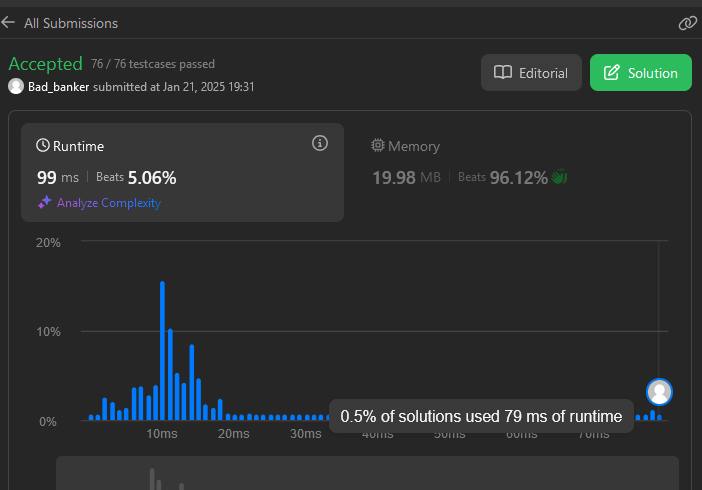</img>

Very Unoptimal Solution - Time Complexity : $O(NlogN)$

In [ ]:
#NeetCode code - Internet Code
#Hashsets

def containsDuplicate(self, nums):
    hashset = set()
    
    for n in nums:
        if n in hashset:
            return True
        hashset.add(n)
    return False

#this is O(n) complexity 

<h3 style = "text-align:center;color:pink">Hashtables : Hash Functions, Sets& Maps</h3><>

- Hashmaps are know as Dictionaries in python :It stores information called values and pairs them up with unique identifiers, called keys.
- Two reasons to use Hashmaps:
    - Cutom keys are easier for a software engineer to work with.
    - HashMaps allow for search in O(1), whereas arrays/linked lists are O(n).
- Hashmaps are built off of Arrays using HashFunctions, HashFuncitons are already implemented in  
    almost all modern programming languages. Understand HashFuncitons later if needed. 
- Main thing about Hash funciton is that once they map data to a key, they cannot change this key.
    This means that any key in a HashMap must always be immutable. So, if you try to assign a mutable type
    of data as key like an array, you will get a Type Error  :  unhashahble type: 'list'
- Example to understand better: Say you have a list of country capitals. You store them in an array  
    in order to find a particular capital you have to check against each entry.  
    Say you stored this in a Dictionary with keys being country name and values being country capital  
    to find something you give key to Hash function which returns corresponding index and voila. 
- Retrieving data from  HashMaps:
    - `hashmap.keys()`: returns all of the keys from the dictionary, in the form of a list.
    - `hashmap.values()` : same as above except values.
    - `hashmap.items()` : returns a list of all of the key-value pairs as tuples.

In [25]:
city_map = {}  #Dictionary

cities = ["Calagary", "Vancouver", "Toronto"]
city_map["Canada"].append(cities)

KeyError: 'Canada'

<font color = "Red">KeyError because that key does not exist in your Hashmap yet. You have to first initialize the key to store value corresponding to that key.</font>

In [28]:
city_map["Canada"] = []  #initialize Canada key
city_map["Canada"].append(cities)
city_map

{'Canada': [['Calagary', 'Vancouver', 'Toronto']]}

To avoid assigning an empty array to our keys every single time we can use a specific type of dictionary in Python called a DefaultDict,  
which will have an empty array, or other type of data, assigned to a key by default.   
`Dictionary : All keys need to be initialized`  
`DefaultDict : All keys are already intialized`

In [29]:
#DefaultDict code:
from collections import defaultdict

city_map = defaultdict(list)
city_map

defaultdict(list, {})

In [40]:
city_map.clear() #clear dictionary
cities = ["Calagary", "Vancouver", "Toronto"]
city_map["Canada"].append(cities)
city_map

defaultdict(list, {'Canada': [['Calagary', 'Vancouver', 'Toronto']]})

<font color = "cyan">Problem_49:</font> Given an array of strings strs, group the anagrams together. You can return the answer in any order.

Input: `strs = ["eat","tea","tan","ate","nat","bat"]`  
Output: `[["bat"],["nat","tan"],["ate","eat","tea"]]`

In [21]:
def groupAnagrams(self, strs):
    def counter(s1):
        D = defaultdict(int) 
        for i in s1:
            D[i] = D[i] + 1
        return D
    st = []
    for i in  strs:
       st.append(counter(i))
    return  st 

groupAnagrams(0,["eat","tea","tan","ate","nat","bat"])

#This apporach won't work since you are breaking shit

[defaultdict(int, {'e': 1, 'a': 1, 't': 1}),
 defaultdict(int, {'t': 1, 'e': 1, 'a': 1}),
 defaultdict(int, {'t': 1, 'a': 1, 'n': 1}),
 defaultdict(int, {'a': 1, 't': 1, 'e': 1}),
 defaultdict(int, {'n': 1, 'a': 1, 't': 1}),
 defaultdict(int, {'b': 1, 'a': 1, 't': 1})]

In [6]:
#One approach I am thinking
# 1. Take a word, sort it make it a key and store original word against it
# 2. keep doing it, the anagrams will automatically get stored in the same key

from collections import defaultdict

def groupAnagrams(self, strs):
    D = defaultdict(list)
    A = []
    for i in strs:
        D["".join(sorted(i))].append(i)
        
    for k in D:
        A.append(D[k])
    return A
groupAnagrams(0,["eat","tea","tan","ate","nat","bat"])
    

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

- Time complexity of the above solution is $O(N*K*logN)$

In [12]:
from collections import defaultdict

def groupAnagrams(self, strs):
    D = defaultdict(list)
    A = []
    for i in strs:
        D["".join(sorted(i))].append(i)
        
    # A = list(D.values)
    # return A
    return list(D.values())
groupAnagrams(0,["eat","tea","tan","ate","nat","bat"])

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

- This further reduces the time complexity to $O(NlogN)$ since you do not have to iterate through the dictionary anymore.

<font color = "cyan">Problem_242:</font> Given two strings s and t, return true if t is an
anagram  of s, and false otherwise.

In [21]:
#How I will approach is split and check content of each array

def isAnagram(self,s,t):
    a =  sorted(list(s.strip().lower()))
    b =  sorted(list(t.strip().lower()))
            
    if a == b:
        return True

    return False

- Can we optimize this more - current complexity is $O(NlogN)$.
- What is Hashing? Precise meaning with one or 2 problems in python.
- Get familiar with sets.
- Get familiar with Dictionaries.

In [17]:
#make a set of string?
from collections import defaultdict

#Approach  is  to  convert first strings to set to see their characters 
#if characters in each set are same then  we can proceed otherwise  code ends
#if  set equal then we count each from string , make it as key and just count
#defaultdict(int) is used so that whatever key is created in the for loop, it's1
#already assigned zero
def isAnagram(self, s, t): 
    st1 = set(s)
    st2 = set(t)

    def counter(s1,st):
        D = defaultdict(int) 
        for i in s1:
            if i in st:
                D[i] = D[i] + 1
        return D

    if st1 == st2:
        D1 = counter(s,st1)
        D2 = counter(t,st2)
        return(D1 == D2)
    return False

#Time complexity of this code is O(N)

True


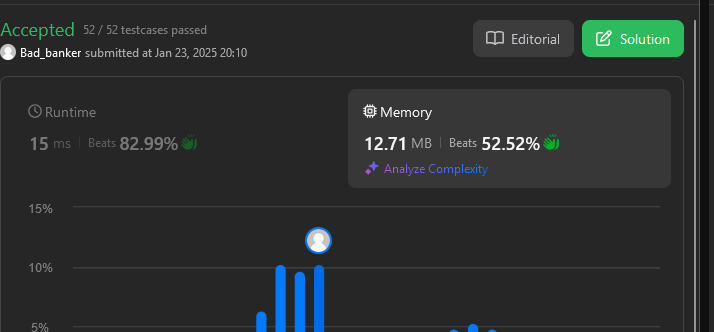



In [2]:
from collections import defaultdict

def isAnagram(self, s, t): 
    # st1 = set(s)
    # st2 = set(t)

    def counter(s1):
        D = defaultdict(int) 
        for i in s1:
            D[i] = D[i] + 1
        return D

    if len(s) == len(t):
        return(counter(s) == counter(t))
    
    return False

s1 = "anagram"
s2 = "nagaram"

isAnagram(0,s1,s2)

True

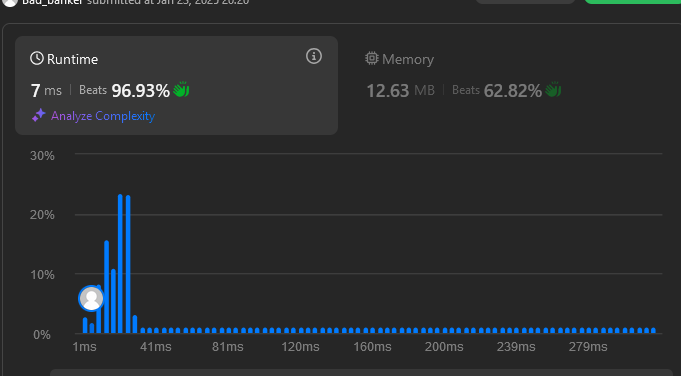

<em>If I do not make sets, code is faster</em>

In [ ]:
#Internet Code - NeetCode Solution
#Logic is same just implementation is different
#Also you do not need to iterate through dictionaries and compare each key, value pair "==" operator is enough
#The other method is same as what I did, sorting 

class Solution:
    def isAnagram(self, s, t):
        if len(s) != len(t):
            return False

        countS, countT = {} ,  {}

        for i in range(len(s)):
            countS[s[i]] = 1 + countS.get(s[i],0)
            countT[t[i]] = 1 + countT.get(t[i], 0)

        for c in countS:
            if countS[c] != countT.get(c,0):
                return False
        return True 


In [5]:
#sort string and compare

def isAnagram(self, s, t):
    return sorted(s) == sorted(t)

a = "anagram"
b = "nagaram"

isAnagram(0,a,b)

True

<font color = "cyan">Problem_347:</font> Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

Example 1:  
`Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]

Example 2:  
`Input: nums = [1], k = 1
Output: [1]`

- Create a default dict with integer values
- iterate through array and make a counter function which counts occcurencce
- make a list of values list(D.values())
- Overall complexity should be less than O(NlogN) -if I use a sort function, that will be a problem

In [16]:
from collections import defaultdict

def topKFrequent(sef, nums, k):
    D = defaultdict(int)
    for i in nums:
        D[i] = D[i] + 1
    s = sorted(D.values(), reverse=True)[0:k]
    #top optimize this code, figure out a way to remove this sorted() step-that
    #will help.
    #reasoning behind the step ? - to sort the frequency in descending order and take out the  
    #highest k frequencies 
    #and later finding keys relative to them 
    
    a = []
    for key,value in D.items():
        if value in s:
            a.append(key)
    return a

nums = [1,1,1,2,2,3,4,4,4,4,4,4]

topKFrequent(0,nums,3)
    

[1, 2, 4]

In [17]:
d = {'a': 1, 'b': 2, 'c': 2}
s = [1,4,2,3]
a = []
for key,value in d.items():
        if value in s:
                a.append(key)

print(a)

['a', 'b', 'c']


- This solves the problem but is of time complexity $O(NlogN)$ - not that useful then.

In [39]:

#logic is first created the counter dictionary then flip it
#take max value of count(n) and create a dictionary from 0 to n
#now store each number against that count in a list 

from collections import defaultdict

def topKFrequent(sef, nums, k):
    D = defaultdict(int)
    D2 = defaultdict(list)
    A = []
    for i in nums:
        D[i] = D[i] + 1
    k1 = max(D.values()) #max key value of count to element dictionary. 
    
    for i in range(0,k1+1):            #initialized a dictionary with key as frequency
        D2[i] = []
   

    for key,value in D.items():        #comapring value of counter dictionary with keys in 
        if value in D2.keys():         #D2 and then storing corresponding key against count in D2
            D2[value].append(key)
    
    key = list(D2.keys())[::-1]
    for i in key:
        if len(A) <=k:
            if len(D2[i]) >0 and len(D2[i]) <= k:
                A.extend(D2[i])
            if len(A) <= k and len(D2[i]) > k:      #say if all are distinct numbers then all are at 1
                A.extend(D2[i][0:k - len(A)])       #no number will be added to A since the length of 
                                                    #list at D2[i] > whatever k we required - no element 
        if len(A) == k:                             #added to A - we want something so k-len(A) elements
            return A                                #from list at D2[i] -len(A) in case A already has elements  
    
    return A
     
        
nums = [1,2,3,4,5,6]
topKFrequent(0,nums,3)

[1, 2, 3]

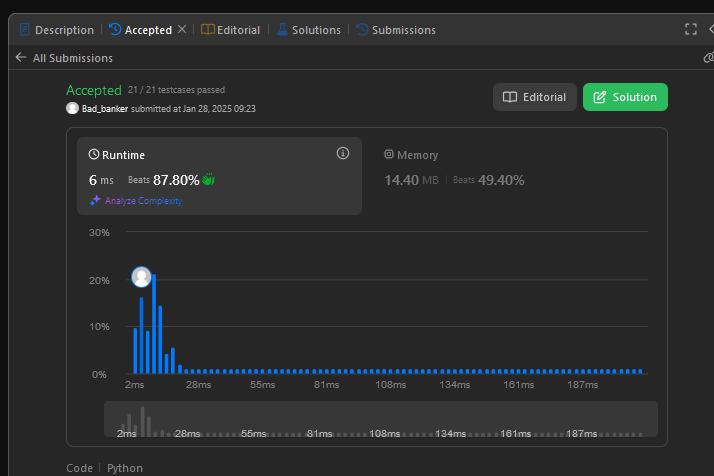 

- Sure time  complexity is now $O(N)$ but space complexity is high also wtf have I made I myself need to understand.\
    There must be a way to simplify code.
- This technique is called <font color = "red">Bucket Sort</font>

In [43]:
#Internet Solution - Neetcode

def topKFrequent(sef, nums, k):
    count = {}
    freq = [[] for i in range(len(nums) + 1)]

    for n in nums:
        count[n] = 1 + count.get(n,0)
        
    for n, c in count.items():
        freq[c].append(n)
        
    res  = []
    
    for i in range(len(freq) - 1, 0, -1):
        for n in freq[i]:                 #going through each element of list at freq[i]
            res.append(n)
            if len(res) == k:
                return res

nums = [1,2,3,4,5,6]
topKFrequent(0,nums,2)

[1, 2]

<h3 style = "text-align:center;color:pink">Two Pointer technique</h3>

<font color = "cyan">Problem_347:</font> Given a string s, return true if it is a palindrome, or false otherwise.

Example 1:

Input: s = "A man, a plan, a canal: Panama"  
Output: true  
Explanation: "amanaplanacanalpanama" is a palindrome.  

Example 2:

Input: s = "race a car"  
Output: false  
Explanation: "raceacar" is not a palindrome.

Example 3:

Input: s = " "  
Output: true  
Explanation: s is an empty string "" after removing non-alphanumeric characters.  
Since an empty string reads the same forward and backward, it is a palindrome.  


In [1]:

def isPalindrome(self,s):
    b1 = "".join(s[::-1].lower().split(" "))
    b2 = "".join(s.lower().split(" "))
    c,d = "",""

    for i in range(0,len(b1)):
        if b1[i].isalphanum():
            c = c+b1[i]
        if b2[i].isalphanum():
            d = d+b2[i]
    
    return c==d        

isPalindrome(0, "0S")

True

In [14]:
#Solution taken from solutions in the leetcode.

def isPalindrome(self,s):
    s = s.lower()
    b1 = "".join([char for char in s if char.isalnum()])
    b2 = b1[::-1]
    print(b2,b1)
    # c,d = "",""

    # for i in range(0,len(b1)):
    #     if b1[i].isalphanum():
    #         c = c+b1[i]
    #     if b2[i].isalphanum():
    #         d = d+b2[i]
    
    return b2 == b1    


isPalindrome(0, "A man, a plan, a canal: Panama")   

#Say we do not want to use alnum() and without using more memory

amanaplanacanalpanama amanaplanacanalpanama


True

In [ ]:
#Internet code - Neetcode
#pointer technique
#

def isPalindrome(self,s):
    l,r = 0, len(s) - 1
    def alphaNUM(self,c):  #function to check if a character is alphanumeric - using ascii codes range ord() gives ascii codes of character
        return (ord("A") <= ord(c) <= ord("Z") or
            ord("a") <= ord(c) <= ord("z") or
            ord("0") <= ord(c) <= ord("9"))
        
    while l < r and  not alphaNUM(s[l]):
        l +=1 
        
    while r > l and not alphaNUM(s[r]):
        r= r+1
            
    if s[l].lower() != s[r].lower():
        return False

In [13]:

s = "A man, a plan, a canal: Panama"
s.lower()
s

'A man, a plan, a canal: Panama'

<font color = "cyan">Problem_977:</font> Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

 

<em>Example 1:</em>

Input: nums = [-4,-1,0,3,10]\
Output: [0,1,9,16,100]\
Explanation: After squaring, the array becomes [16,1,0,9,100]\
After sorting, it becomes [0,1,9,16,100].

<em>Example 2:</em>

Input: nums = [-7,-3,2,3,11]\
Output: [4,9,9,49,121]

 

In [1]:
def sortedSquares(self,nums):
    def squared(s):
        return s**2
    
    sqr = list(map(squared,nums))
    l,r = 0, len(sqr)-1
    A=[]
    
    while  l <= r:
        if sqr[l] > sqr[r]:
            A.append(sqr[l])
            l = l+1
        elif sqr[l] <= sqr[r]:
            A.append(sqr[r])
            r = r-1
        # elif sqr[l] == sqr[r]:
        #     A.append(sqr[l])
        #     A.append(sqr[r])
        #     r = r-1
    
    
    return A[::-1]

nums = [-7,-3,2,3,11]
sortedSquares(0,nums)

[4, 9, 9, 49, 121]

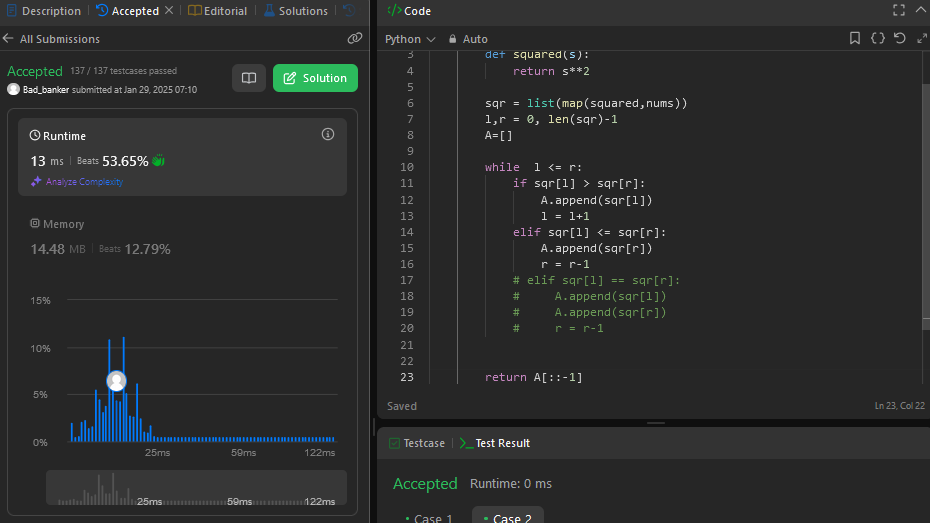

- Can do better, for sure.

In [5]:
#Internet code - Greg Hogg

def sortedSquares(self,nums):
    left = 0 
    right = len(nums) - 1
    result = []
    
    while left <= right:
        if abs(nums[left]) > abs(nums[right]):
            result.append(nums[left]**2)
            left += 1
        else:
            result.append(nums[right]**2)
            right -=1
            
    return result[::-1]
    
nums = [-7,-3,2,3,11]
sortedSquares(0,nums)

[4, 9, 9, 49, 121]

In [8]:
#remove square function and map funciton 

def sortedSquares(self,nums):
    # def squared(s):
    #     return s**2
    
    # sqr = list(map(squared,nums))
    l,r = 0, len(nums)-1
    A=[]
    
    while  l <= r:
        if abs(nums[l]) > abs(nums[r]):
            A.append(nums[l]**2)
            l = l+1
        else:
            A.append(nums[r]**2)
            r = r-1
            
    return A[::-1]
        # elif sqr[l] == sqr[r]:
        #     A.append(sqr[l])
        #     A.append(sqr[r])
        #     r = r-1

nums =[-4,-1,0,3,10]    
sortedSquares(0,nums)

[0, 1, 9, 16, 100]

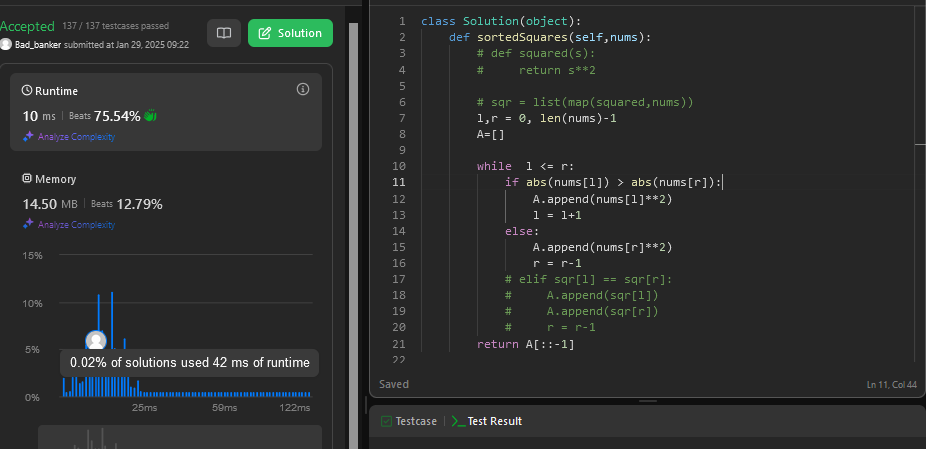

- not that better!

<font color = "cyan">Problem_167:</font> Given a 1-indexed array of integers numbers that is already sorted\ 
in non-decreasing order, find two numbers such that they add up to a specific target number.Letthese two numbers\
 be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.\
Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.


In [8]:
def twoSum(self, numbers, target):
    l, r = 0, len(numbers) - 1
    s = 0
    while l <= r:
        if numbers[l] + numbers[r] == target:
            return[l+1, r+1]
        elif numbers[l] + numbers[r] > target:
            r -= 1
        else:
            l +=1     
    return None       


nums = [2,7,11,15]
twoSum(0, nums, 18) 
twoSum(0,[3,2,4], 6) 

In [9]:
def twoSum(self, nums, target):
    l, r = 0, len(nums) - 1
    while l<=r:
        if  nums[l] + nums[r] > target:
            r-=1
        elif nums[l] + nums[r] < target:
            l+=1
        else:
            return [l,r]
    return None

twoSum(0,[3,2,4], 6)        


<font color = "cyan">Problem_167:</font> Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.


<em>Example:</em>\
Input: nums = [-1,0,1,2,-1,-4]\
Output: [[-1,-1,2],[-1,0,1]]\
Explanation:\
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0\
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.\
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.\
The distinct triplets are [-1,0,1] and [-1,-1,2].\
Notice that the order of the output and the order of the triplets does not matter.

<em>Intution:</em> Take a number then find -ve compliment of that number using two sum technique (will have to sort the array first).
